In [88]:
import pandas as pd
import numpy as np
import pickle
from ta.volatility import BollingerBands
import matplotlib.pyplot as plt
import os
import sys

from config import BASE_DIR
print(os.getcwd())
os.chdir(BASE_DIR)
print(BASE_DIR)
import scripts.functions as fn

from scripts.indicators import find_pivots,donchian

C:\Users\lbisa\Dropbox\Cripto\python\InvestingEvolution\ie\www
C:\Users\lbisa\Dropbox\Cripto\python\InvestingEvolution\ie\www


In [95]:
klines_file =  './backtest/klines/2d01/Completo_BTCUSDT_2d01_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/2d01/Lateral_BTCUSDT_2d01_2023-06-20_2023-10-09.DataFrame'
#klines_file = './backtest/klines/1h01/Completo_BTCUSDT_1h01_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/0m15/Completo_XRPUSDT_0m15_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/0m01/Completo_BTCUSDT_0m01_2021-01-01_2023-07-31.DataFrame'

with open(klines_file, 'rb') as file:
    df = pickle.load(file)
df.set_index('datetime',inplace=True)
start_date = klines_file.split('/')[4].split('_')[3] #Extrae la fecha de inicio
start_date = pd.to_datetime(start_date, format='%Y-%m-%d')
start_date = start_date.replace(hour=0, minute=0, second=0)
df = df[df.index >= start_date]
#df.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}, inplace=True)



In [93]:
def perc_pend(y):
    ln = len(y)
    base = y[0]
    py = (y/base)*100
    pend = fn.pendiente(py)
    return pend



class Strategy:
       
    def signal(self,df):
       
        
        # Pivots
        df['ma'] = df['Close'].rolling(window=21).mean()
        
         
        df = find_pivots(df, dev_threshold = 3.0)
        
        df['compra'] = df['min_pivot'] > 0
        df['venta']  = df['max_pivot'] > 0

        df['signal'] = np.where(df['compra'], 'COMPRA', 'NEUTRO')
        df['signal'] = np.where(df['venta'], 'VENTA',df['signal'])
        

        """ 
        df = donchian(df)
        df['dch_amp'] = df['dch_max'] - df['dch_min']
        df['compra'] = (df['close'] < df['dch_mean']) & (df['dch_max'] == df['dch_max'].shift(3)) & (df['dch_amp'].shift(2) > df['dch_amp'].shift(3))
        df['venta']  = (df['close'] > df['dch_mean']) & (df['dch_amp'] == df['dch_amp'].shift(3)) & (df['dch_amp'].shift(2) > df['dch_amp'].shift(3))

        df['signal'] = np.where(df['compra'], 'COMPRA', 'NEUTRO')
        df['signal'] = np.where(df['venta'], 'VENTA',df['signal'])

        df['buy_price']  = np.where(df['compra'],df['close'],None)
        df['sell_price'] = np.where(df['venta'],df['close'],None)
        """
        return df


In [94]:

# Aplicar la función signal
df = Strategy().signal(df)

#Pivots
df['buy_price']  = None#np.where(df['compra'],df['close'],None)
df['sell_price'] = None#np.where(df['venta'],df['close'],None)
df[['High','Low','max_pivot','min_pivot','buy_price','sell_price']].plot(figsize=(20,6),style=['#dddddd','#dddddd','r-^','g-v','g-o','r-o'])
""" 
df[['close','dch_mean','dch_max','dch_min','buy_price','sell_price']].plot(figsize=(20,6),style=['#aaaaaa','#dddddd','r-^','g-v','g-o','r-o'])
"""


KeyError: 'high'

In [ ]:
def next(row):
    pass

data = df[['datetime','open','low','high','close','volume','signal']].loc[0:5]

events = data['datetime'].copy()
pre_signal = 'NEUTRO' 
velas = data['datetime'].count()
print(f'Procesando ',end="\r")
for row in data.itertuples():
    next(row)
    pre_signal = 'NEUTRO' 
data['datetime'].count()

json_data = data.to_json(orient='records')
print(json_data)

[{"datetime":1591401600000,"open":9621.17,"low":9531.05,"high":9735.0,"close":9666.3,"volume":32752.950893,"signal":"NEUTRO"},{"datetime":1591488000000,"open":9666.85,"low":9372.46,"high":9802.0,"close":9746.99,"volume":57952.848385,"signal":"NEUTRO"},{"datetime":1591574400000,"open":9746.99,"low":9633.0,"high":9800.0,"close":9782.01,"volume":40664.664125,"signal":"NEUTRO"},{"datetime":1591660800000,"open":9782.0,"low":9570.0,"high":9877.0,"close":9772.43,"volume":46024.001289,"signal":"NEUTRO"},{"datetime":1591747200000,"open":9772.44,"low":9704.18,"high":9992.72,"close":9885.0,"volume":47130.762982,"signal":"COMPRA"},{"datetime":1591833600000,"open":9885.22,"low":9113.0,"high":9964.0,"close":9280.4,"volume":94418.98473,"signal":"NEUTRO"}]


count    939.000000
mean      -0.007423
std        2.259422
min       -8.200000
25%       -0.900000
50%        0.000000
75%        1.035000
max        7.400000
Name: pend, dtype: float64
1.129710909294955


<Axes: xlabel='datetime'>

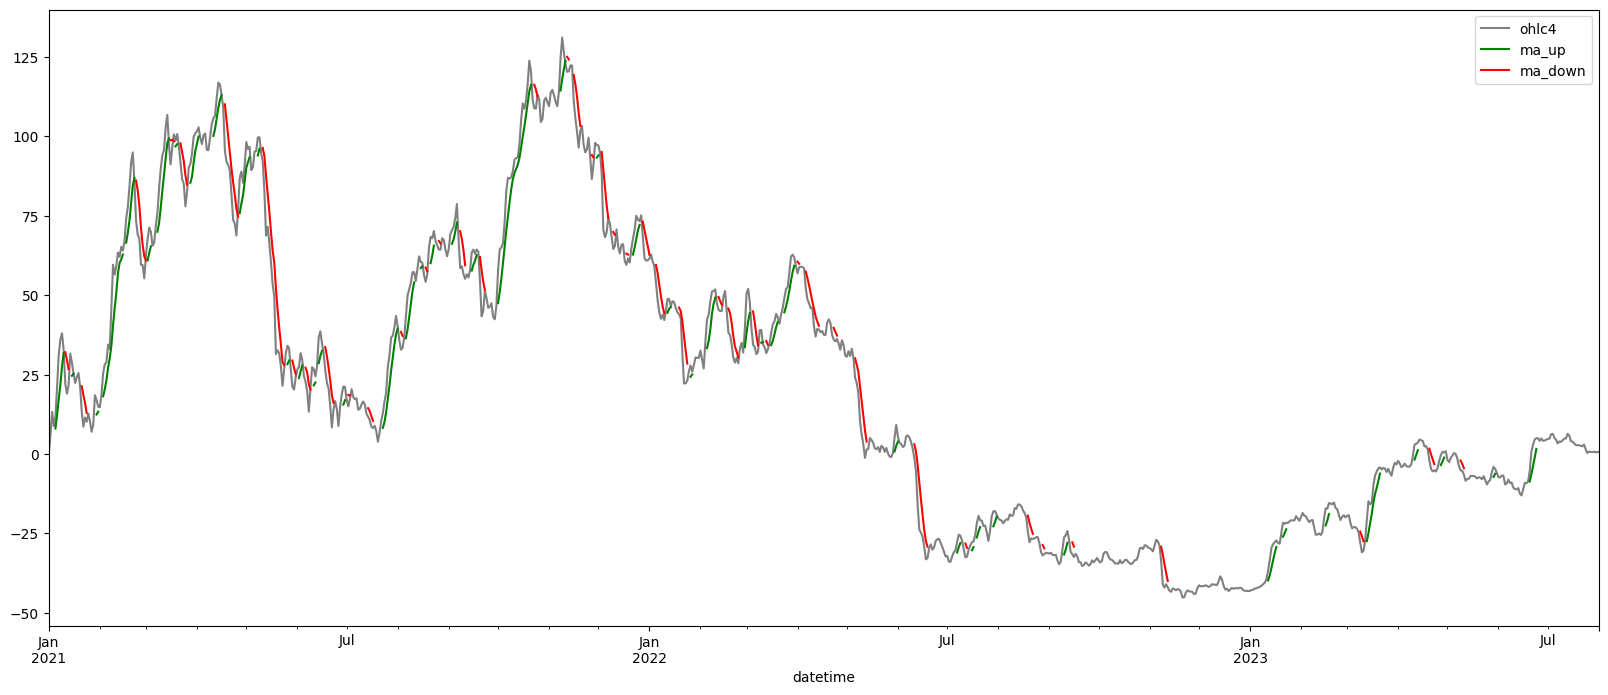

In [96]:
#CALCULO DE PENDIENTE

def pendiente(y):
    qty = len(y)
    x = np.arange(qty)
    p = np.polyfit(x, y, 1)
    pend = round(p[0],2)
    #print(y,pend)
    return pend

df['ohlc4'] = (df['high']+df['low']+df['open']+df['close'])/4
df['ohlc4'] = ((df['ohlc4']/df.iloc[0]['ohlc4'])-1)*100
df['pend'] = df['ohlc4'].rolling(window=5).apply(pendiente, raw=False)
df['ma'] = df['ohlc4'].rolling(window=5).mean()

print(df['pend'].describe())
range = df['pend'].std()/2
print(range)

df['ma_up'] = df[df['pend']>range]['ma']
df['ma_down'] = df[df['pend']<-range]['ma']

df[['ohlc4','ma_up','ma_down']].plot(figsize=(20,8),style=['gray','green','red','gray'])

